# Initiation aux big data

M2 HB - RC

**Instructions :**<br />
Exécutez tous les blocs de codes.<br />
Modifier les blocs quand nécessaire (Question 1 à 14).

---------


<b>Q1 - Ajoutez votre nom-prénom dans le titre "initiation aux big data" en double cliquant sur la cellule</b>

# Notebook Jupyter

Le notebook est une succession de cellules de code et de cellule de Markdown, une syntaxe permettant d'afficher du texte.

<u>Zone Markdown :</u>

utilisée pour afficher du texte

<u>Zone code :</u><br />
La cellule de code peut être identifé par les crochets sur la gauche. Elle est executée par le bouton lecture et peut retourner un résultat, qui s'affiche à la suite. Voici un exemple ci-dessous :

In [132]:
1 + 1

[1] 2

<b>Q2 - Exécutez la zone de code ci-dessous.</b>

In [133]:
for (i in 1:2)
{
    print(1)
}

[1] 1
[1] 1


<b>Q3 - Cliquez sur cette cellule, puis sur le bouton + (en haut à gauche) pour insérer une nouvelle cellule à la suite. Par défaut, cette cellule exécute du code. Placez une addition très simple et exécuter la cellule.</b>

<b>Q4 - Cliquez sur cette cellule, puis sur le bouton + (en haut à gauche) pour insérer une nouvelle cellule à la suite. Par défaut, cette cellule exécute du code. Modifiez **Code** vers **Markdown** puis renseignez la date.</b>



# Chargement des bibliothèques

In [134]:
library(dplyr)
library(ggplot2)
library(lubridate)
library(wordcloud)
library(readxl)
library(stringr)
library(tm)

# Chargement du fichier

In [150]:
# Vérifier que le fichier est bien présent

list.files()

[1] "etudiants_fantomes.xlsx"             "etudiants_initiation_big_data.ods"  
[3] "exportDash"                          "initiation_big_data_220117_v2.ipynb"
[5] "initiation_big_data_220117_v3.ipynb" "questions.ods"

In [152]:
#data = read.csv2("data/extraction_suicidal_tweets_v2.csv", stringsAsFactors = FALSE)
data = readxl::read_xlsx("export_twitter.xlsx")

In [153]:
# Vérifier que le fichier a bien été chargé

# Structure du tableau
str(data)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1001 obs. of  8 variables:
 $ X           : num  0 1 2 3 4 5 6 7 8 9 ...
 $ URL         : chr  "https://twitter.com/gothmunik/status/1211797501730336768" "https://twitter.com/gothmunik/status/1211797236818104321" "https://twitter.com/melanie_prt/status/1211796462058835971" "https://twitter.com/auroreqoi/status/1211796293816868866" ...
 $ Text        : chr  "je suis simplement moins attachée à l'événement lui même mais j'ai perdu énormément confiance en moi et je suis"| __truncated__ "oki bientôt l'année est finie je peux dire que je suis 1peu fière de moi parce que je me rends plus malade a ca"| __truncated__ "@juvcntusrl pareil pour l’anxiété c’est un processus et ça sattenu en plusieurs étapes et moi e crois en toi po"| __truncated__ "Demain je doit me lever tôt. Je suis a un summum d'anxiété et je ne peut pas prendre de Xanax.\n\nVoila" ...
 $ Datetime    : chr  "2019-12-30T23:53:33+00:00" "2019-12-30T23:52:30+00:00" "2019-12-30T23:49:25+00:

In [154]:
# 5 premières lignes
head(data)

X URL                                                        
1 0 https://twitter.com/gothmunik/status/1211797501730336768   
2 1 https://twitter.com/gothmunik/status/1211797236818104321   
3 2 https://twitter.com/melanie_prt/status/1211796462058835971 
4 3 https://twitter.com/auroreqoi/status/1211796293816868866   
5 4 https://twitter.com/lagarde19/status/1211795826990878730   
6 5 https://twitter.com/Charley_Nova/status/1211795147605848064
  Text                                                                                                                                                                                                                                                                     
1 je suis simplement moins attachée à l'événement lui même mais j'ai perdu énormément confiance en moi et je suis devenu super anxieuse à propos de tout, que ce soit sociale ou scolaire, c'est 1enfer mais 1jour j'y arriverai d'acc &gt;:(                              
2 oki bientôt l'année est finie je peux dire que je suis 1peu fière de moi parce que je me rends plus malade a cause du * de mon père b et même si mon anxiété veut pas me lâcher, je me sens 1 peu moins mal de plus être autant attacher à ce qu'il s'est passé y a 2 ans
3 @juvcntusrl pareil pour l’anxiété c’est un processus et ça sattenu en plusieurs étapes et moi e crois en toi pour que tarrives a la gerer &lt;3333                                                                                                                       
4 Demain je doit me lever tôt. Je suis a un summum d'anxiété et je ne peut pas prendre de Xanax.\n\nVoila                                                                                                                                                                  
5 Ma réponse à Est-ce que l'intelligence est un vecteur d'anxiété ? https://t.co/T9Q222gzZO                                                                                                                                                                                
6 @Noathing_Art J'avoue que ça doit être l'anxiété qui me frêne, j'avais jamais fait le rapprochement ;-;                                                                                                                                                                  
  Datetime                  RetweetCount ReplyCount LikeCount Username    
1 2019-12-30T23:53:33+00:00 0            0          1         gothmunik   
2 2019-12-30T23:52:30+00:00 3            0          1         gothmunik   
3 2019-12-30T23:49:25+00:00 1            0          0         melanie_prt 
4 2019-12-30T23:48:45+00:00 0            0          2         auroreqoi   
5 2019-12-30T23:46:53+00:00 0            0          0         lagarde19   
6 2019-12-30T23:44:11+00:00 1            0          0         Charley_Nova

In [155]:
# Nombre de lignes - nombre de colonnes
dim(data)

[1] 1001    8

# Data management

## Package dplyr
https://dplyr.tidyverse.org/

select - filter - arrange - mutate - group by - summarize

## Select

La commande **select** permet de sélectionner des colonnes.<br /> 
Dans l'instruction suivante, **select** est utilisé pour sélectionner les colonnes **Datetime** et **Text** reconnues par R.

In [156]:
data_select = dplyr::select(data, c(Datetime, Text))
head(data_select)

Datetime                 
1 2019-12-30T23:53:33+00:00
2 2019-12-30T23:52:30+00:00
3 2019-12-30T23:49:25+00:00
4 2019-12-30T23:48:45+00:00
5 2019-12-30T23:46:53+00:00
6 2019-12-30T23:44:11+00:00
  Text                                                                                                                                                                                                                                                                     
1 je suis simplement moins attachée à l'événement lui même mais j'ai perdu énormément confiance en moi et je suis devenu super anxieuse à propos de tout, que ce soit sociale ou scolaire, c'est 1enfer mais 1jour j'y arriverai d'acc &gt;:(                              
2 oki bientôt l'année est finie je peux dire que je suis 1peu fière de moi parce que je me rends plus malade a cause du * de mon père b et même si mon anxiété veut pas me lâcher, je me sens 1 peu moins mal de plus être autant attacher à ce qu'il s'est passé y a 2 ans
3 @juvcntusrl pareil pour l’anxiété c’est un processus et ça sattenu en plusieurs étapes et moi e crois en toi pour que tarrives a la gerer &lt;3333                                                                                                                       
4 Demain je doit me lever tôt. Je suis a un summum d'anxiété et je ne peut pas prendre de Xanax.\n\nVoila                                                                                                                                                                  
5 Ma réponse à Est-ce que l'intelligence est un vecteur d'anxiété ? https://t.co/T9Q222gzZO                                                                                                                                                                                
6 @Noathing_Art J'avoue que ça doit être l'anxiété qui me frêne, j'avais jamais fait le rapprochement ;-;

<b>Q5 - Modifiez l'instruction suivante pour sélectionner les colonnes **RetweetCount** et "ReplyCount".</b>

In [157]:
data_select = dplyr::select(data, c(Datetime, Text))
head(data_select)

Datetime                 
1 2019-12-30T23:53:33+00:00
2 2019-12-30T23:52:30+00:00
3 2019-12-30T23:49:25+00:00
4 2019-12-30T23:48:45+00:00
5 2019-12-30T23:46:53+00:00
6 2019-12-30T23:44:11+00:00
  Text                                                                                                                                                                                                                                                                     
1 je suis simplement moins attachée à l'événement lui même mais j'ai perdu énormément confiance en moi et je suis devenu super anxieuse à propos de tout, que ce soit sociale ou scolaire, c'est 1enfer mais 1jour j'y arriverai d'acc &gt;:(                              
2 oki bientôt l'année est finie je peux dire que je suis 1peu fière de moi parce que je me rends plus malade a cause du * de mon père b et même si mon anxiété veut pas me lâcher, je me sens 1 peu moins mal de plus être autant attacher à ce qu'il s'est passé y a 2 ans
3 @juvcntusrl pareil pour l’anxiété c’est un processus et ça sattenu en plusieurs étapes et moi e crois en toi pour que tarrives a la gerer &lt;3333                                                                                                                       
4 Demain je doit me lever tôt. Je suis a un summum d'anxiété et je ne peut pas prendre de Xanax.\n\nVoila                                                                                                                                                                  
5 Ma réponse à Est-ce que l'intelligence est un vecteur d'anxiété ? https://t.co/T9Q222gzZO                                                                                                                                                                                
6 @Noathing_Art J'avoue que ça doit être l'anxiété qui me frêne, j'avais jamais fait le rapprochement ;-;

## Filter

In [158]:
data_filter = dplyr::filter(data, LikeCount > 10)
# Affiche le nombre de lignes
nrow(data_filter)

[1] 38

<b>Q6 - Modifiez l'instruction suivante pour filtrer les tweets et ne conserver que ceux pour lesquels le nombre de like est supérieur à 20.</b>

In [160]:
data_filter = dplyr::filter(data, LikeCount > 10) 
# Affiche le nombre de lignes
nrow(data_filter)

[1] 38

## Mutate

La commande **mutate** permet de calculer des nouvelles colonnes ou modifier des colonnes existantes.<br /> 
Dans l'instruction suivante, mutate est utilisé pour convertir la date (renseignée au départ au format texte) dans un format **date** reconnu par R.

In [161]:
data = dplyr::mutate(data, date = lubridate::ymd_hms(paste0(base::substr(data$Datetime,1,10), " ", base::substr(data$Datetime,12,19))))
str(data)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1001 obs. of  9 variables:
 $ X           : num  0 1 2 3 4 5 6 7 8 9 ...
 $ URL         : chr  "https://twitter.com/gothmunik/status/1211797501730336768" "https://twitter.com/gothmunik/status/1211797236818104321" "https://twitter.com/melanie_prt/status/1211796462058835971" "https://twitter.com/auroreqoi/status/1211796293816868866" ...
 $ Text        : chr  "je suis simplement moins attachée à l'événement lui même mais j'ai perdu énormément confiance en moi et je suis"| __truncated__ "oki bientôt l'année est finie je peux dire que je suis 1peu fière de moi parce que je me rends plus malade a ca"| __truncated__ "@juvcntusrl pareil pour l’anxiété c’est un processus et ça sattenu en plusieurs étapes et moi e crois en toi po"| __truncated__ "Demain je doit me lever tôt. Je suis a un summum d'anxiété et je ne peut pas prendre de Xanax.\n\nVoila" ...
 $ Datetime    : chr  "2019-12-30T23:53:33+00:00" "2019-12-30T23:52:30+00:00" "2019-12-30T23:49:25+00:

### Extraction du jour

L'instruction **mutate** et la fonction **lubridate::wday** permettent d'extraire le jour à partir de la date du tweet.

In [162]:
data = dplyr::mutate(data, day = lubridate::wday(date, label = TRUE))
str(data)  

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1001 obs. of  10 variables:
 $ X           : num  0 1 2 3 4 5 6 7 8 9 ...
 $ URL         : chr  "https://twitter.com/gothmunik/status/1211797501730336768" "https://twitter.com/gothmunik/status/1211797236818104321" "https://twitter.com/melanie_prt/status/1211796462058835971" "https://twitter.com/auroreqoi/status/1211796293816868866" ...
 $ Text        : chr  "je suis simplement moins attachée à l'événement lui même mais j'ai perdu énormément confiance en moi et je suis"| __truncated__ "oki bientôt l'année est finie je peux dire que je suis 1peu fière de moi parce que je me rends plus malade a ca"| __truncated__ "@juvcntusrl pareil pour l’anxiété c’est un processus et ça sattenu en plusieurs étapes et moi e crois en toi po"| __truncated__ "Demain je doit me lever tôt. Je suis a un summum d'anxiété et je ne peut pas prendre de Xanax.\n\nVoila" ...
 $ Datetime    : chr  "2019-12-30T23:53:33+00:00" "2019-12-30T23:52:30+00:00" "2019-12-30T23:49:25+00

### Extraction du mois

<b>Q7 - Modifier l'instruction en remplaçant la fonction **lubridate::wday** par la fonction **lubridate::month** pour extraire le mois.</b>

In [163]:
data = dplyr::mutate(data, month = lubridate::wday(date, label = TRUE))
str(data)  

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1001 obs. of  10 variables:
 $ X           : num  0 1 2 3 4 5 6 7 8 9 ...
 $ URL         : chr  "https://twitter.com/gothmunik/status/1211797501730336768" "https://twitter.com/gothmunik/status/1211797236818104321" "https://twitter.com/melanie_prt/status/1211796462058835971" "https://twitter.com/auroreqoi/status/1211796293816868866" ...
 $ Text        : chr  "je suis simplement moins attachée à l'événement lui même mais j'ai perdu énormément confiance en moi et je suis"| __truncated__ "oki bientôt l'année est finie je peux dire que je suis 1peu fière de moi parce que je me rends plus malade a ca"| __truncated__ "@juvcntusrl pareil pour l’anxiété c’est un processus et ça sattenu en plusieurs étapes et moi e crois en toi po"| __truncated__ "Demain je doit me lever tôt. Je suis a un summum d'anxiété et je ne peut pas prendre de Xanax.\n\nVoila" ...
 $ Datetime    : chr  "2019-12-30T23:53:33+00:00" "2019-12-30T23:52:30+00:00" "2019-12-30T23:49:25+00

### Extraction de l'heure

In [164]:
data = dplyr::mutate(data, hour = lubridate::hour(date))
str(data)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1001 obs. of  11 variables:
 $ X           : num  0 1 2 3 4 5 6 7 8 9 ...
 $ URL         : chr  "https://twitter.com/gothmunik/status/1211797501730336768" "https://twitter.com/gothmunik/status/1211797236818104321" "https://twitter.com/melanie_prt/status/1211796462058835971" "https://twitter.com/auroreqoi/status/1211796293816868866" ...
 $ Text        : chr  "je suis simplement moins attachée à l'événement lui même mais j'ai perdu énormément confiance en moi et je suis"| __truncated__ "oki bientôt l'année est finie je peux dire que je suis 1peu fière de moi parce que je me rends plus malade a ca"| __truncated__ "@juvcntusrl pareil pour l’anxiété c’est un processus et ça sattenu en plusieurs étapes et moi e crois en toi po"| __truncated__ "Demain je doit me lever tôt. Je suis a un summum d'anxiété et je ne peut pas prendre de Xanax.\n\nVoila" ...
 $ Datetime    : chr  "2019-12-30T23:53:33+00:00" "2019-12-30T23:52:30+00:00" "2019-12-30T23:49:25+00

### Extraction du nombre de caractères

In [165]:
data = dplyr::mutate(data, nb_char = nchar(Text))

## group_by / summarize

Les instructions **group_by** et **summarize** permettent de regrouper des enregistrements en fonction d'une variable, et de calculer des nouvelles variables. Elles sont souvent utilisées pour compter la fréquence de groupes.

### Nombre de tweets par jour

Dans le code suivant, les tweets sont regroupés par la fonction **group_by** en fonction du jour durant lequel ils ont été publiés. Pour chaque jour, la fonction **summarize** compte le nombre de tweets grâce à la fonction **n**.

In [166]:
tweets_by_days = data %>% 
                group_by(day) %>% 
                summarize(nb_tweets = n())
tweets_by_days

day    nb_tweets
1 dim\\. 195      
2 lun\\. 233      
3 jeu\\. 185      
4 ven\\. 216      
5 sam\\. 172

### Nombre de tweets par heure
<b>Q8 - Modifiez l'instruction pour regrouper par heure (colonne **hour**) et compter le nombre de tweets.</b>

In [167]:
tweets_by_hour = data %>% 
                group_by(day) %>% 
                summarize(nb_tweets = n())
tweets_by_hour

day    nb_tweets
1 dim\\. 195      
2 lun\\. 233      
3 jeu\\. 185      
4 ven\\. 216      
5 sam\\. 172

## Graphiques

### Hist

La fonction **hist** permet de produire un histogramme à partir d'une variable quantitative (ici *nb_char*). Le paramètre **main** permet de définir le titre du graphique, le paramètre **xlab** le titre de l'axe des abscisses et le paramètre **ylab** le titre de l'axe des ordonnées.

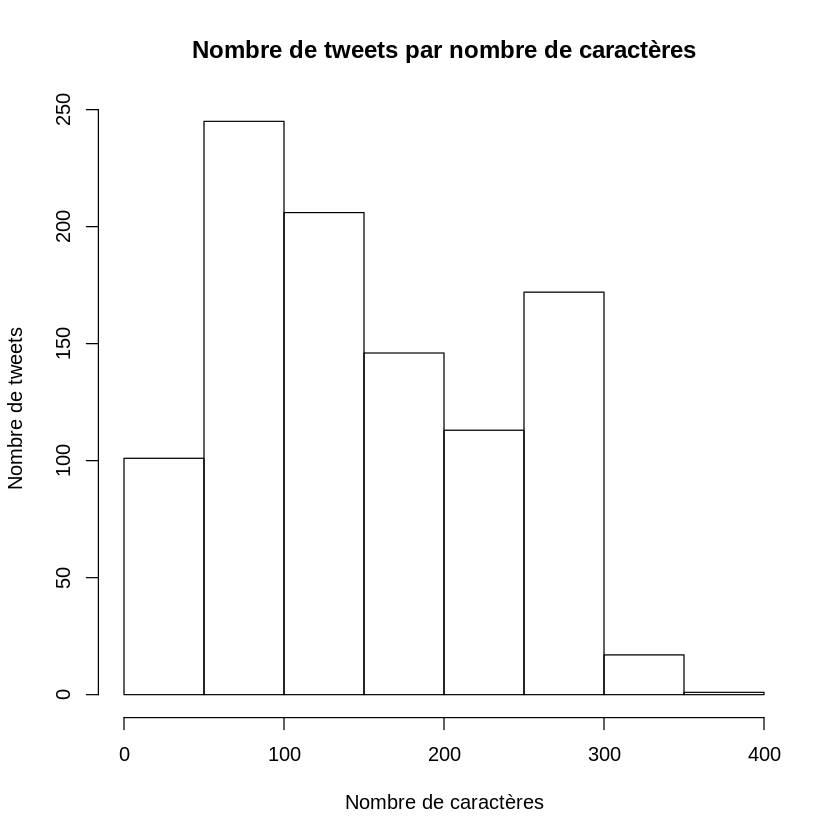

In [168]:
hist(data$nb_char, 
     main = "Nombre de tweets par nombre de caractères", 
     xlab = "Nombre de caractères", 
     ylab = "Nombre de tweets")

<b>Q9 - Modifiez le code suivant pour produire l'histogramme du nombre de like. Modifiez le titre du graphique ainsi que le titre de l'axe des ordonnées).</b>

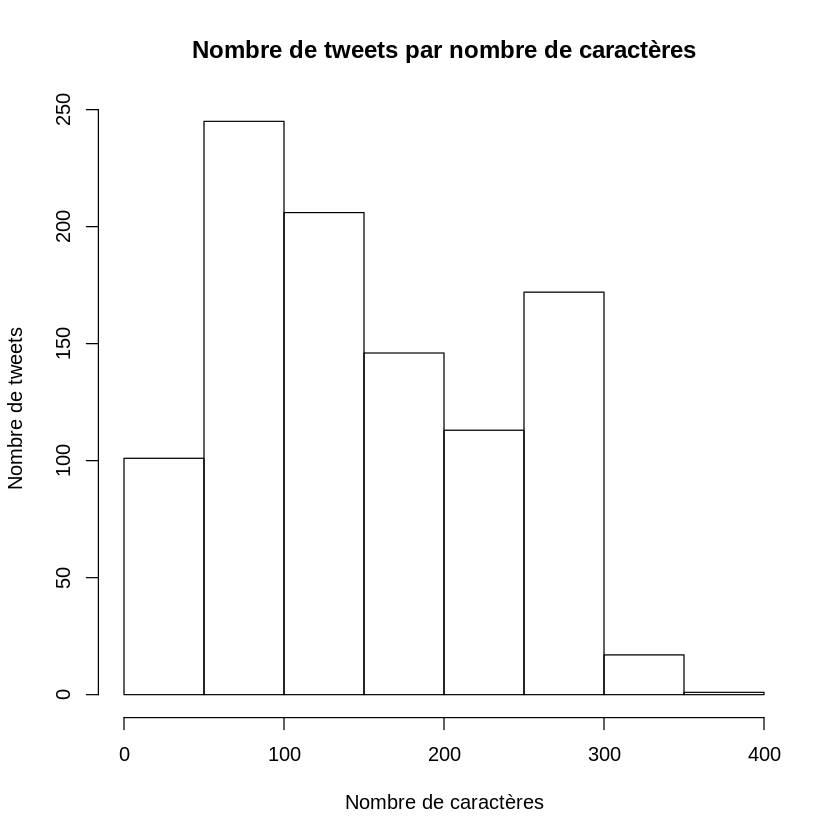

In [169]:
hist(data$nb_char, 
     main = "Nombre de tweets par nombre de caractères", 
     xlab = "Nombre de caractères", 
     ylab = "Nombre de tweets")

### Barplot

La fonction barplot produit un diagramme en barre à partir d'un tableau de deux colonnes. Nous reprenons ici le tableau **tweets_by_days** qui contient le nombre de tweets par jour. La première variable correspond au nombre de tweet. La seconde variable correspond au jour. Le paramètre **main** définit le titre du graphique, le paramètre **xlab** le titre de l'axe des abscisses, le paramètre **ylab** le titre de l'axe des ordonnées, le paramètre **col** définit la couleur du graphique.

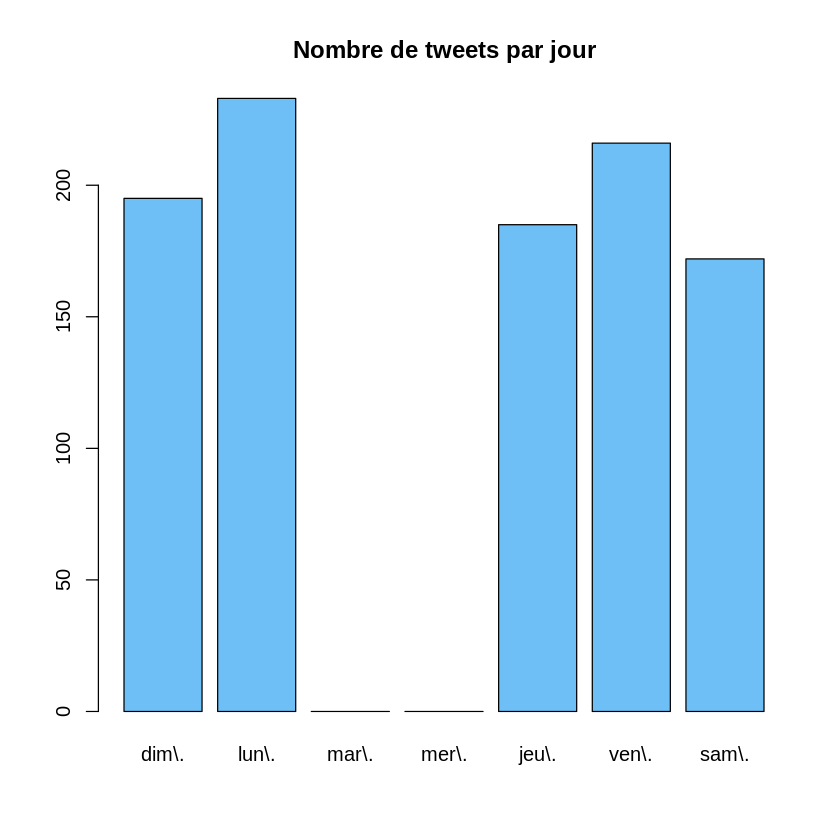

In [170]:
barplot(tweets_by_days$nb_tweets ~ tweets_by_days$day, 
        main = "Nombre de tweets par jour", 
        xlab = "", 
        ylab = "", 
        col = "#6dbff6")

<b>Q10 - Reprenez le code ci-dessous et adaptez le pour produire le graphique du nombre de tweets par heure, à partir du tableau **tweets_by_hour**. Modifiez le titre du graphique.</b>

<b>Q11 - Adaptez le code ci-dessous pour que la couleur du graphique soit "red".</b>

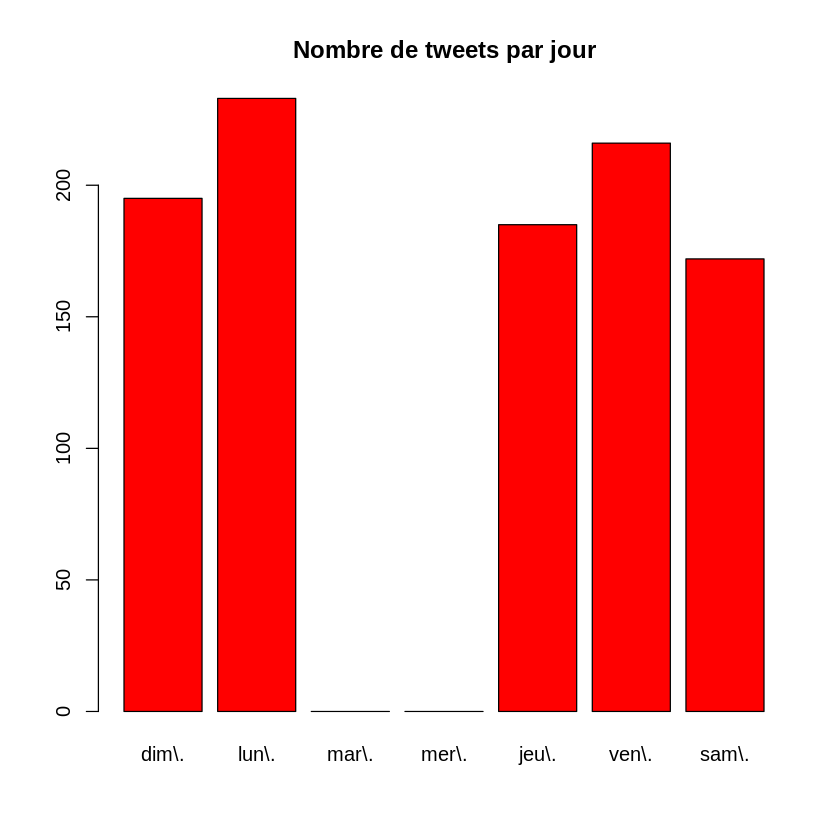

In [171]:
barplot(tweets_by_days$nb_tweets ~ tweets_by_days$day, 
        main = "Nombre de tweets par jour", 
        xlab = "", 
        ylab = "", 
        col = "#6dbff6")

## Data management (2) - Nettoyage des tweets

Le nettoyage des tweets (préprocessing) permet d'homogénéiser le style d'écriture entre les différents utilisateurs. Cette étape est nécessaire avant chaque analyse. Dans cette partie , le nettoyage permettra d'obtenir de meilleurs résultats pour notre nuage de mots.

Les fonctions utilisées dans la prochaine cellule permettront de : 
- Retier les urls dans chaque tweets
- Retirer les \, ', -, et les espaces dupliqués
- Passer le texte en minuscule
- Retirer les accents
- Retirer la ponctuation

In [172]:
# remove urls
data$tweet_clean = gsub('http\\S+\\s*', '', data$Text)

# remove \ ' spaces
data$tweet_clean =gsub("[\\]","",data$tweet_clean)
data$tweet_clean =gsub("[’']"," ",data$tweet_clean)
data$tweet_clean =gsub("-"," ",data$tweet_clean)

data$tweet_clean =gsub("\\s+"," ",data$tweet_clean)
data$tweet_clean =gsub("\\s*$"," ",data$tweet_clean)
data$tweet_clean =gsub("[\\s+]$","",data$tweet_clean)
data$tweet_clean =gsub("^[\\s+]","",data$tweet_clean)
 
# to lower case
data$tweet_clean = tolower(data$tweet_clean)

# remove accents
data$tweet_clean = gsub("[éèêë]","e",data$tweet_clean)
data$tweet_clean =gsub("[àâ]","a",data$tweet_clean)
data$tweet_clean =gsub("[ùûü]","u",data$tweet_clean)
data$tweet_clean =gsub("[ôö]","u",data$tweet_clean)

# remove ponctuation
data$tweet_clean = gsub("[?,:/.!;]","",data$tweet_clean)


### vérification

On va maintenant comparer nos tweets avant et après le nettoyage

In [174]:
head(data %>% select(Text, tweet_clean))

Text                                                                                                                                                                                                                                                                     
1 je suis simplement moins attachée à l'événement lui même mais j'ai perdu énormément confiance en moi et je suis devenu super anxieuse à propos de tout, que ce soit sociale ou scolaire, c'est 1enfer mais 1jour j'y arriverai d'acc &gt;:(                              
2 oki bientôt l'année est finie je peux dire que je suis 1peu fière de moi parce que je me rends plus malade a cause du * de mon père b et même si mon anxiété veut pas me lâcher, je me sens 1 peu moins mal de plus être autant attacher à ce qu'il s'est passé y a 2 ans
3 @juvcntusrl pareil pour l’anxiété c’est un processus et ça sattenu en plusieurs étapes et moi e crois en toi pour que tarrives a la gerer &lt;3333                                                                                                                       
4 Demain je doit me lever tôt. Je suis a un summum d'anxiété et je ne peut pas prendre de Xanax.\n\nVoila                                                                                                                                                                  
5 Ma réponse à Est-ce que l'intelligence est un vecteur d'anxiété ? https://t.co/T9Q222gzZO                                                                                                                                                                                
6 @Noathing_Art J'avoue que ça doit être l'anxiété qui me frêne, j'avais jamais fait le rapprochement ;-;                                                                                                                                                                  
  tweet_clean                                                                                                                                                                                                                                                              
1 je suis simplement moins attachee a l evenement lui meme mais j ai perdu enormement confiance en moi et je suis devenu super anxieuse a propos de tout que ce soit sociale ou scolaire c est 1enfer mais 1jour j y arriverai d acc &gt;(                                 
2 oki bientut l annee est finie je peux dire que je suis 1peu fiere de moi parce que je me rends plus malade a cause du * de mon pere b et meme si mon anxiete veut pas me lacher je me sens 1 peu moins mal de plus etre autant attacher a ce qu il s est passe y a 2 ans 
3 @juvcntusrl pareil pour l anxiete c est un processus et ça sattenu en plusieurs etapes et moi e crois en toi pour que tarrives a la gerer &lt;3333                                                                                                                       
4 demain je doit me lever tut je suis a un summum d anxiete et je ne peut pas prendre de xanax voila                                                                                                                                                                       
5 ma reponse a est ce que l intelligence est un vecteur d anxiete                                                                                                                                                                                                          
6 @noathing_art j avoue que ça doit etre l anxiete qui me frene j avais jamais fait le rapprochement ; ;

APrès cette vérification, il nous reste des caractères spéciaux à retirer (ponctuation, "stopwords"). <br>
Les **stopwords** sont des mots vides, c'est à dire des mots n'appportant pas plus de sens au texte (ex. Conjonction de coordination, prépositions). <br> <br>
Pour retirer la ponctuation et les stopwords, le texte doit être transformé en **corpus**. Cela veut dire que le texte est changé en une liste de mots (chaque phrase va être découpée en liste de mots). Un mot est caractérisé par une suite de caractères séparée par un espace.
A partir de la liste des mots, il est plus simple de retirer les mots non désirés (stopwords) et les caractères spéciaux (ponctuation).

In [178]:
#### get corpus
corpus = Corpus(VectorSource(data$tweet_clean))

In [179]:
# remove stopwords
stopword = append(stopwords("french"), c("ça","aussi","vrai","donc","petit","bah","car","deja","quoi","encor", "mieux","toujour",
                                         "dan","tout","cest","plus","meme",'fait','bien','comm',"cett","rien","tous","trop","nest","quon","comme"))
corpus <- tm_map(corpus,removeWords,stopword)
corpus <- tm_map(corpus, removeWords,c("l","j","d","c"))

# remove spaces
corpus <- tm_map(corpus, stripWhitespace)

Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopword):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, removeWords, c("l", "j", "d", "c")):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
“transformation drops documents”

In [180]:
tweet_clean = data.frame(text = sapply(corpus, as.character), stringsAsFactors = FALSE)
head(tweet_clean)

text                                                                                                                                                              
1  simplement moins attachee a evenement perdu enormement confiance devenu super anxieuse a propos sociale scolaire 1enfer 1jour arriverai acc &gt;(                
2 oki bientut annee finie peux dire 1peu fiere parce rends malade a cause * pere b si anxiete veut lacher sens 1 peu moins mal etre autant attacher a passe a 2 ans 
3 @juvcntusrl pareil anxiete processus sattenu plusieurs etapes e crois tarrives a gerer &lt;3333                                                                   
4 demain doit lever tut a summum anxiete peut prendre xanax voila                                                                                                   
5  reponse a intelligence vecteur anxiete                                                                                                                           
6 @noathing_art avoue doit etre anxiete frene jamais rapprochement ; ;

In [181]:
dim(tweet_clean)

[1] 339   1

### Nuage de mots

<b>Q12 - Adaptez le code ci-dessous pour que la couleur du nuage de mots ("COULEUR") soit "RdBu".</b>

word       freq
anxiete    anxiete    710 
anxieux    anxieux    130 
anxieuse   anxieuse   121 
etre       etre       117 
faire      faire       73 
quand      quand       64 
depression depression  63 
avoir      avoir       55 
vie        vie         53 
vraiment   vraiment    50

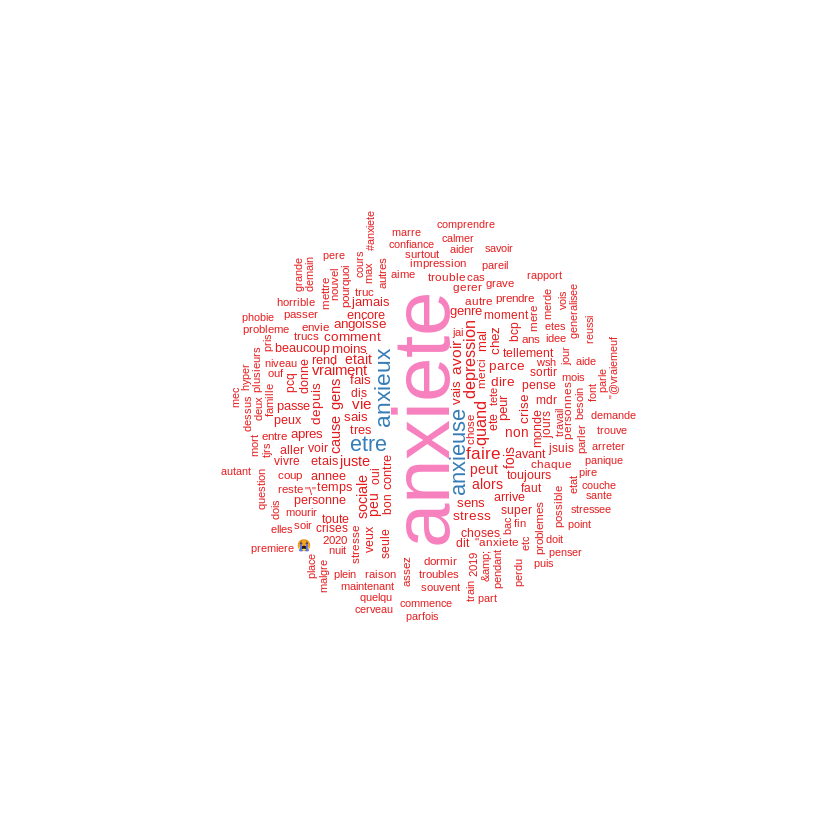

In [182]:
docs = Corpus(VectorSource(tweet_clean))
dtm <- TermDocumentMatrix(docs)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
head(d, 10)

set.seed(1234)
wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "COULEUR"))

### Top mentions (@) et hashtags (#)

Hashtags analyse : 
- Extraction des hashtags 
- Calcul de la fréquence de chaque hashtag avec la fonction **table**
- Visualisation graphique du top 20 des hashtags

In [183]:
# le pattern permettant de détecter les hashtags :
pattern = "#[a-zA-Z0-9_]+"

# extraction
hashtag <- str_extract_all(tweet_clean, pattern)

# calcul de fréquence
hashtag_count <- table(hashtag)
top_20_freqs <- sort(hashtag_count, decreasing = TRUE)[1:20]

# affichage des fréquences (20 premiers)
top_20_freqs

Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”

hashtag
            #anxiete          #resilience              #stress 
                   9                    4                    3 
       #2019in5words               #acwri            #angoisse 
                   2                    2                    2 
            #bouddha       #bourdindirect             #conflit 
                   2                    2                    2 
             #crimes                 #foi            #highered 
                   2                    2                    2 
                #jdr              #macron                #peur 
                   2                    2                    2 
             #priere #puissancedelapriere          #relaxation 
                   2                    2                    2 
            #rheaahh                #tdah 
                   2                    2 

Selecting by hashtag


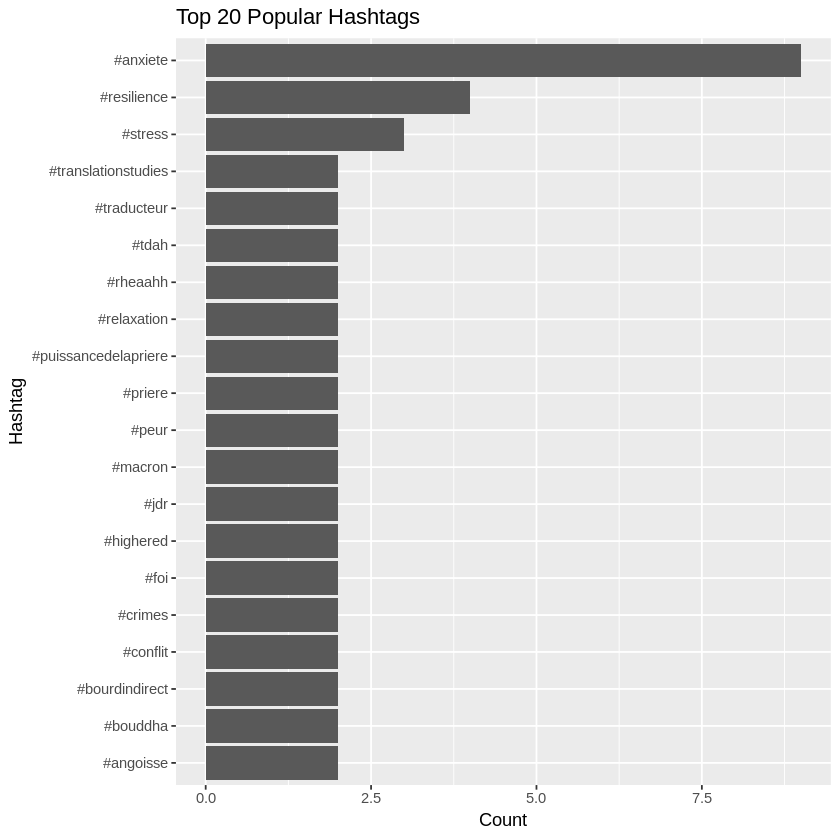

In [184]:
#visualisation
hashtag_word <- unlist(hashtag)

as.data.frame(hashtag_word) %>%
  count(hashtag_word, sort = TRUE) %>%
  mutate(hashtag = reorder(hashtag_word, n)) %>%
  top_n(20) %>%
  ggplot(aes(x = hashtag, y = n)) +
  geom_col() +
  coord_flip() +
  labs(x = "Hashtag",
       y = "Count",
       title = "Top 20 Popular Hashtags")

<b>Q13 - Adaptez le code ci-dessous pour analyser et tracer le graphique des mentions (@) les plus fréquentes en remplaçant le pattern # par @.</b> 

 <p style="color:#21618c";><b>Adapter le titre du graphique.</b> <p/>

In [186]:
# le pattern permettant de détecter les mentions : remplacer # par @ :
pattern_mention = "#[a-zA-Z0-9_]+"

# extraction
mention <- str_extract_all(tweet_clean, pattern_mention)

# calcul de fréquence
mention_count <- table(mention)
top_20_freqs_mention <- sort(mention_count, decreasing = TRUE)[1:20]

# affichage des fréquences (20 premiers)
top_20_freqs_mention

Warning message in stri_extract_all_regex(string, pattern, simplify = simplify, :
“argument is not an atomic vector; coercing”

mention
      @vraiemeuf      @asiatitude       @livressee           @horia 
               9                7                5                4 
      @enzorebut    @femmehomtaie @ilyatonsourire_   @jeanalexanian 
               3                3                3                3 
            @lci     @psychomedia        @twoinou_    @arianagrande 
               3                3                3                2 
     @badidea_ag          @baejsk    @brutofficiel       @cdanslair 
               2                2                2                2 
     @deasylizzy        @deezerfr @evanvaerenbergh    @grandetourfr 
               2                2                2                2 

Selecting by mention


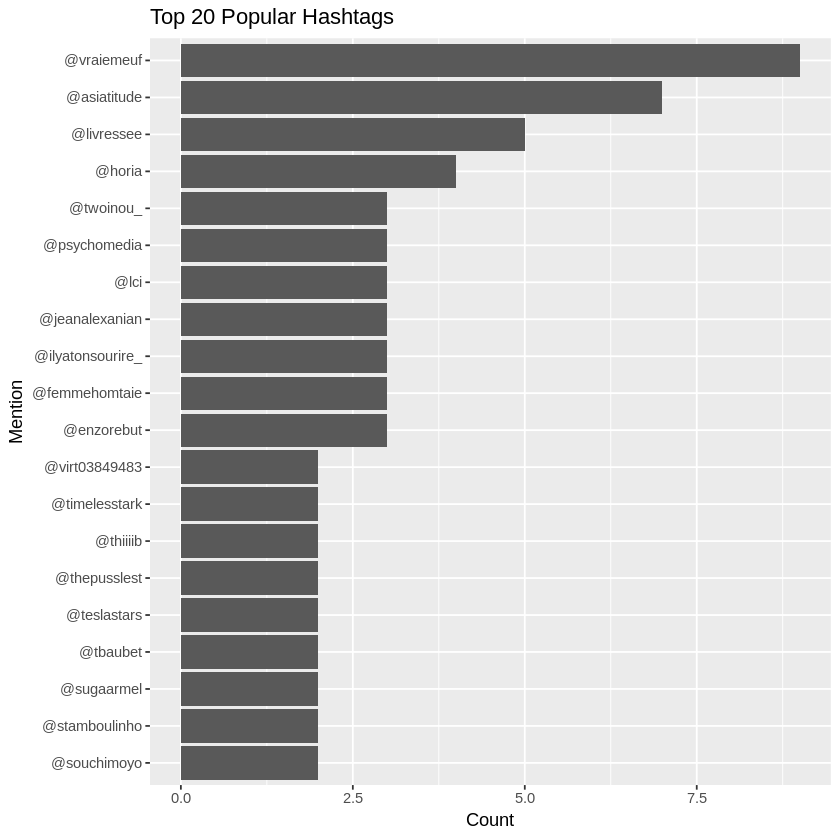

In [187]:
#visualisation
mention_word <- unlist(mention)

as.data.frame(mention_word) %>%
  count(mention_word, sort = TRUE) %>%
  mutate(mention = reorder(mention_word, n)) %>%
  top_n(20) %>%
  ggplot(aes(x = mention, y = n)) +
  geom_col() +
  coord_flip() +
  labs(x = "Mention",
       y = "Count",
       title = "Top 20 Popular Hashtags")

<b>Q14 - Exportez le notebook au format PDF (en haut à gauche, File / Export Notebook As... / PDF. Envoyez le moi par mail.</b>

## 